In [1]:
import numpy as np
import os
import cv2
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
import random



In [2]:
pickle_in = open("X_test.pickle","rb")
X_test =pickle.load(pickle_in)

#pickle_in = open("X_train.pickle","rb")
#X_train =pickle.load(pickle_in)

pickle_in = open("Y_test.pickle","rb")
Y_test =pickle.load(pickle_in)

pickle_in = open("X_val.pickle","rb")
X_val = pickle.load(pickle_in)

pickle_in = open("Y_val.pickle","rb")
Y_val = pickle.load(pickle_in)


In [3]:
print(X_test.shape)
print(X_val.shape)
print(Y_test.shape)
print(Y_val.shape)

(480000, 624)
(480000, 16)
(1, 624)
(1, 16)


In [4]:
X_test = X_test/255.0

In [5]:
print(X_test)


[[0.36470588 0.4745098  0.17647059 ... 0.00784314 0.6745098  0.10980392]
 [0.36470588 0.4745098  0.17647059 ... 0.00784314 0.6745098  0.10980392]
 [0.36470588 0.4745098  0.17647059 ... 0.00784314 0.6745098  0.10980392]
 ...
 [0.         0.09803922 0.10588235 ... 0.03529412 0.11372549 0.        ]
 [0.         0.09803922 0.10588235 ... 0.03529412 0.11372549 0.        ]
 [0.         0.09803922 0.10588235 ... 0.03529412 0.11372549 0.        ]]


In [6]:

X_val = X_val/255.0



In [7]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [8]:
def initialization(dim):
    #w = np.zeros(shape=(dim,1),dtype=np.float32)
    #b = 0
    w = np.random.randn(dim,1)*0.01
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w,b

In [9]:
def propragate(w,b,X,Y):
    m= X.shape[1]
    #fordward propragate
    A = sigmoid(np.dot(w.T,X)+b)
    cost = -1/m * np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis = 1) 
    #backpropragate
    dw = 1/m*(np.dot(X,(A-Y).T))
    db = 1/m*(np.sum(A-Y))

    cost = np.squeeze(cost)
    grads = {"dw":dw,
            "db":db}
    
    return grads,cost

In [10]:
def optimize(w,b,X,Y,num_iterations,learning_rate,print_cost = True):
    costss=[]
    for i in range(num_iterations):
        
        grads,cost = propragate(w,b,X,Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w-learning_rate*dw
        b = b-learning_rate*db
        

                # Record the costs
        if i % 100 == 0:
            costss.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    params = {"w":w,
             "b":b}
    grads= {"dw":dw,
           "db":db}
    return params,grads,costss

In [11]:
def predict(w,b,X):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X)+b)
    w = w.reshape(X.shape[0],1)
    prediction = np.zeros((1,m))
    
    
    for i in range(A.shape[1]):
        if(A[0,i]>0.5):
            prediction[0,i] = 1
        else:
            prediction[0,i] = 0
    return prediction
            
    


In [12]:
# function to create a list containing mini-batches 
def create_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 

In [1]:
def finalmodel(X_test,Y_test,X_val,Y_val,num_iterations = 2000,learning_rate = 0.5, print_cost = False):
    w, b = initialization(X_test.shape[0])
    
    params, grads,costss = optimize(w,b,X_test,Y_test,num_iterations,learning_rate,print_cost)
    w = params["w"]
    b = params["b"]
    
    Y_prediction_train = predict(w,b,X_test)
    Y_prediction_test = predict(w,b,X_val)
        
        # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_test)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_val)) * 100))
    
    d = {"costs": costss,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
           
    return d

In [14]:
d = finalmodel(X_test, Y_test, X_val, Y_val, num_iterations = 2500, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.694723
Cost after iteration 100: 0.678675
Cost after iteration 200: 0.670528
Cost after iteration 300: 0.666162
Cost after iteration 400: 0.663619
Cost after iteration 500: 0.661962
Cost after iteration 600: 0.660740
Cost after iteration 700: 0.659733
Cost after iteration 800: 0.658835
Cost after iteration 900: 0.657992
Cost after iteration 1000: 0.657177
Cost after iteration 1100: 0.656378
Cost after iteration 1200: 0.655589
Cost after iteration 1300: 0.654805
Cost after iteration 1400: 0.654026
Cost after iteration 1500: 0.653251
Cost after iteration 1600: 0.652478
Cost after iteration 1700: 0.651709
Cost after iteration 1800: 0.650943
Cost after iteration 1900: 0.650179
Cost after iteration 2000: 0.649418
Cost after iteration 2100: 0.648660
Cost after iteration 2200: 0.647905
Cost after iteration 2300: 0.647152
Cost after iteration 2400: 0.646402
train accuracy: 62.5 %
test accuracy: 50.0 %


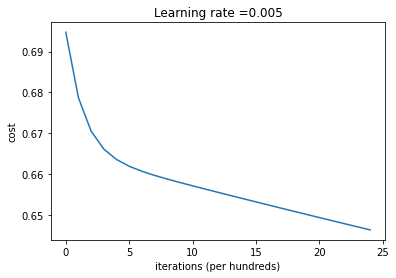

In [15]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()